In [3]:
import pandas as pd
import numpy as np

In [4]:
df_auto=pd.read_csv('automobile.csv')
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
%%capture
!pip install seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df_auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [8]:
df_auto.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [9]:
df_auto[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0, 53280.00374081419)

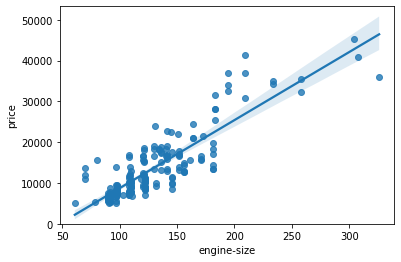

In [10]:
sns.regplot(x="engine-size", y="price", data=df_auto)
plt.ylim(0,)

In [11]:
df_auto[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0, 48172.928271067394)

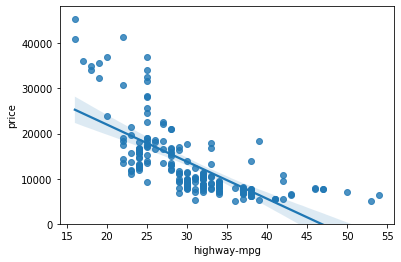

In [12]:
sns.regplot(x='highway-mpg', y='price', data=df_auto)
plt.ylim(0,)

In [13]:
df_auto[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


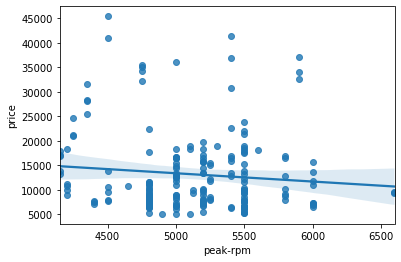

In [14]:
sns.regplot(x='peak-rpm', y = 'price', data=df_auto)

In [ ]:
df_auto[['peak-rpm','price']].corr()

In [ ]:
df_auto[['stroke', 'price']].corr()

In [ ]:
sns.regplot(y='price', x='stroke', data=df_auto)

In [ ]:
sns.boxplot(x='body-style', y='price', data=df_auto)

In [ ]:
sns.boxplot(x='engine-location', y='price', data=df_auto)

In [ ]:
sns.boxplot(x='drive-wheels', y='price', data=df_auto)

In [ ]:
df_auto.describe()

In [ ]:
df_auto.describe(include=['object'])

In [ ]:
df_auto['drive-wheels'].value_counts()

In [ ]:
df_auto['drive-wheels'].value_counts().to_frame()

In [ ]:
drive_wheels_counts=df_auto['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive_wheels':'value_counts'}, inplace=True)
drive_wheels_counts

In [ ]:
drive_wheels_counts.index.name='drive_wheels'
drive_wheels_counts

In [ ]:
engine_loc_counts=df_auto['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_loc_counts.index.name='engine_location'
engine_loc_counts.head(10)

In [ ]:
df_auto['drive-wheels'].unique()

In [ ]:
df_group_one=df_auto[['drive-wheels', 'body-style', 'price']]
df_group_one

In [ ]:
df_group_one=df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

In [ ]:
df_group=df_auto[['drive-wheels', 'body-style', 'price']]
df_group=df_group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group

In [ ]:
group_pivot=df_group.pivot(index='drive-wheels', columns='body-style')
group_pivot

In [ ]:
group_pivot=group_pivot.fillna(0)
group_pivot

In [ ]:
df_group2=df_auto[['price', 'body-style']]
df_group2

In [ ]:
df_group_bodystyle=df_group2.groupby(['body-style'], as_index=False).mean()
df_group_bodystyle

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
fig, ax=plt.subplots()
im=ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels=group_pivot.columns.levels[1]
col_labels=group_pivot.index


#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
df_auto.corr()

## P Value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

    p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
    p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
    p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
    p-value is $>$ 0.1: there is no evidence that the correlation is significant.

We can obtain this information using  "stats" module in the "scipy"  library.


In [ ]:
from scipy import stats

In [ ]:
person_coef, p_value=stats.pearsonr(df_auto['wheel-base'], df_auto['price'])
print("The Person Correlation is", person_coef, "with a P-value of P=", p_value)

In [ ]:
person_coef, p_value=stats.pearsonr(df_auto['horsepower'], df_auto['price'])
print('The PErson Correlation is', person_coef, "with a P_value of P=", p_value)

In [ ]:
person_coef, p_value=stats.pearsonr(df_auto['length'], df_auto['price'])
print("The Person Correlation is", person_coef, "with P-value of P=", p_value)

In [ ]:
person_coef, p_value = stats.pearsonr(df_auto['width'], df_auto['price'])
print("the Person Correlation is", person_coef, "with P-value of P=", p_value)

In [ ]:
#curb-weight, price

person_coef, p_value=stats.pearsonr(df_auto['curb-weight'], df_auto['price'])
print('The person correlation is', person_coef, 'with P-value of P=', p_value)

#engine-size, price

person_coef, p_value=stats.pearsonr(df_auto['engine-size'], df_auto['price'])
print('The person correlation is', person_coef, 'wiht P-value of P=', p_value)

#Bore, price

person_coef, p_value=stats.pearsonr(df_auto['bore'], df_auto['price'])
print('The person correlatin is', person_coef, 'with P_value of P=', p_value)

#City-mpg, price

person_coef, p_value=stats.pearsonr(df_auto['city-mpg'], df_auto['price'])
print('The person correlation is', person_coef, 'with P_value of P=', p_value)

#Highway-mpg, price

person_coef, p_value=stats.pearsonr(df_auto['highway-mpg'], df_auto['price'])
print('The person correlation is', person_coef, 'with P_value of P=', p_value)

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>



In [ ]:
df_group_test=df_group[['drive-wheels', 'price']].groupby(['drive-wheels'])
df_group_test.head()

In [ ]:
df_group

In [ ]:
df_group_test.get_group('4wd'),['price']

In [ ]:
#Anova

f_val, p_val = stats.f_oneway(df_group_test.get_group('fwd')['price'], df_group_test.get_group('rwd')['price'], df_group_test.get_group('4wd')['price'])
print('Anova test result:F=', f_val, ",P", p_value)

In [ ]:
f_val, p_val = stats.f_oneway(df_group_test.get_group('fwd')['price'], df_group_test.get_group('rwd')['price'])
print('Anova test result: F=', f_val, ',P=', p_val)

In [ ]:
f_val, p_val = stats.f_oneway(df_group_test.get_group('4wd')['price'], df_group_test.get_group('rwd')['price'])
print('Anova test result: F=', f_val, ",P=", p_val)

In [ ]:
f_val, p_val=stats.f_oneway(df_group_test.get_group('4wd')['price'], df_group_test.get_group('fwd')['price'])
print('Anova test result: F=', f_val, ',P=', p_val)